In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

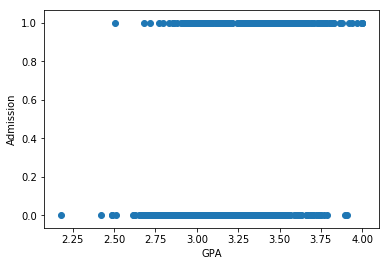

In [2]:
admissions = pd.read_csv('admissions.csv')
plt.scatter(admissions['gpa'], admissions['admit'])
plt.xlabel('GPA')
plt.ylabel('Admission')
plt.show()

In [3]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[['gpa']], admissions['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

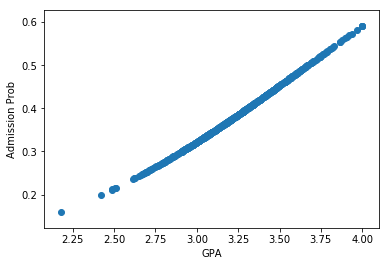

In [4]:
pred_probs = logistic_model.predict_proba(admissions[['gpa']])
plt.scatter(admissions['gpa'], pred_probs[:,1])
plt.xlabel('GPA')
plt.ylabel('Admission Prob')
plt.show()

In [5]:
fitted_labels = logistic_model.predict(admissions[['gpa']])
print(fitted_labels)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 

In [6]:
admissions['predicted_label'] = fitted_labels
admissions['predicted_label'].value_counts()

0    598
1     46
Name: predicted_label, dtype: int64

In [7]:
admissions['actual_label'] = admissions['admit']
matches = admissions['actual_label'] == admissions['predicted_label']
correct_predictions = admissions[matches]
accuracy = len(correct_predictions) / len(admissions)

accuracy

0.6459627329192547

In [8]:
true_pos_subset = (admissions['predicted_label'] == 1) & (admissions['actual_label'] == 1)
true_positives = len(admissions[true_pos_subset])

true_neg_subset = (admissions['predicted_label'] == 0) & (admissions['actual_label'] == 0)
true_negatives = len(admissions[true_neg_subset])

print('True Positive:', true_positives)
print('True Negative:', true_negatives)

True Positive: 31
True Negative: 385


### How effective is this model at identifying positive outcomes?
Calculate the sensitivity or True Positive Rate:

In [9]:
false_neg_subset = (admissions['predicted_label'] == 0) & (admissions['actual_label'] == 1)
false_negatives = len(admissions[false_neg_subset])

sensitivity = (true_positives) / (true_positives + false_negatives)
sensitivity

0.12704918032786885

The sensitivity for the model is `12.7%` or approximatetly 1 in 8 of the graduate students that were admitted should have been admitted. While this model works for graduate school admittance, it does not work in the healthcare context where 7 out of 8 people would be going undiagnosed for an illness. 

To better understand the proportion of applicants that were correctly rejected (i.e. how effective the model is at identifying negative outcomes), you must calculate the specificity or True Negative Rate:

In [12]:
false_pos_subset = (admissions['predicted_label'] == 1) & (admissions['actual_label'] == 0)
false_positives = len(admissions[false_pos_subset])
true_negatives = len(admissions[true_neg_subset])
specificity = (true_negatives) / (true_negatives + false_positives)

specificity

0.9625

The model's specificity is `96.2%` which means it is very effective at accurately predicting which applicants to reject.